# **Diabetics Predictiom Model**

In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [1]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np

In [2]:
# Load data
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
len(diabetes_df[diabetes_df['Outcome']==0])

500

In [4]:
len(diabetes_df[diabetes_df['Outcome']==1])

268

In [5]:
# find the minimum of each column
minValues = print(diabetes_df.min())

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64


In [6]:
maxValues = print(diabetes_df.max())

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64


In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Applying preprocessing techniques
diabetes_df_model = setup(diabetes_df, target = 'Outcome', session_id = 123, use_gpu = True, fix_imbalance = True,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-09-28 23:01:04.899 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-28 23:01:04.913 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-28 23:01:04.920 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num

In [10]:
diabetes_df_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7563,0.8046,0.5833,0.6741,0.6133,0.4382,0.4494,1.030
rf,Random Forest Classifier,0.7562,0.8096,0.6444,0.6548,0.6381,0.4560,0.4657,1.083
ada,Ada Boost Classifier,0.7469,0.7896,0.6722,0.6140,0.6346,0.4433,0.4509,0.206
ridge,Ridge Classifier,0.7395,0.0000,0.7333,0.6119,0.6596,0.4553,0.4664,0.060
gbc,Gradient Boosting Classifier,0.7394,0.7941,0.6444,0.6141,0.6232,0.4255,0.4307,0.494
lda,Linear Discriminant Analysis,0.7394,0.8094,0.7222,0.6116,0.6559,0.4518,0.4609,0.052
lr,Logistic Regression,0.7302,0.8149,0.7222,0.6027,0.6461,0.4353,0.4497,0.086
lightgbm,Light Gradient Boosting Machine,0.7283,0.8005,0.5611,0.6115,0.5750,0.3784,0.3863,0.197
knn,K Neighbors Classifier,0.7042,0.7600,0.7444,0.5518,0.6300,0.3949,0.4105,0.214
nb,Naive Bayes,0.6949,0.7327,0.2056,0.6683,0.3030,0.1743,0.2269,0.028


INFO:logs:create_model_container: 14
2022-09-28 23:02:15.151 INFO    logs: create_model_container: 14
INFO:logs:master_model_container: 14
2022-09-28 23:02:15.156 INFO    logs: master_model_container: 14
INFO:logs:display_container: 2
2022-09-28 23:02:15.160 INFO    logs: display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
2022-09-28 23:02:15.163 INFO    logs: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, ma

In [11]:
diabetes_df_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7469,0.6111,0.5500,0.5789,0.3514,0.3525
1,0.7222,0.7508,0.5000,0.6000,0.5455,0.3478,0.3508
2,0.7407,0.7963,0.5556,0.6250,0.5882,0.4000,0.4015
3,0.7407,0.7901,0.5556,0.6250,0.5882,0.4000,0.4015
4,0.6481,0.6775,0.3889,0.4667,0.4242,0.1739,0.1754
5,0.7963,0.8958,0.7778,0.6667,0.7179,0.5600,0.5641
6,0.8148,0.8333,0.6111,0.7857,0.6875,0.5588,0.5677
7,0.8113,0.8032,0.6111,0.7857,0.6875,0.5554,0.5644
8,0.7736,0.8111,0.7778,0.6364,0.7000,0.5211,0.5279


INFO:logs:create_model_container: 15
2022-09-28 23:03:13.863 INFO    logs: create_model_container: 15
INFO:logs:master_model_container: 15
2022-09-28 23:03:13.869 INFO    logs: master_model_container: 15
INFO:logs:display_container: 3
2022-09-28 23:03:13.872 INFO    logs: display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
2022-09-28 23:03:13.877 INFO    logs: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, ma

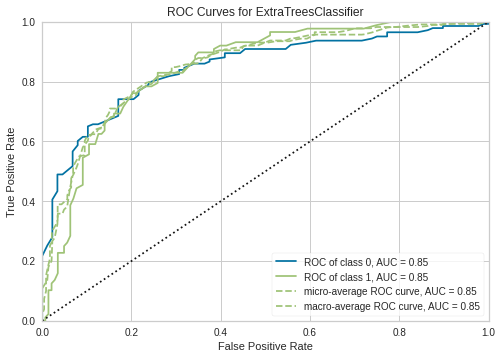

INFO:logs:Visual Rendered Successfully
2022-09-28 23:03:48.811 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-28 23:03:49.104 INFO    logs: plot_model() succesfully completed......................................


In [12]:
plot_model(diabetes_df_model)

In [13]:
save_model(diabetes_df_model, 'diabetes_deployment_model')

INFO:logs:Initializing save_model()
2022-09-28 23:04:49.974 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), model_name=diabetes_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='c

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [ ]:
#Deploying the trained model with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

model = load_model('diabetes_deployment_model')

def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

def run():

    from PIL import Image
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?",
    ("Online", "Batch"))

    st.sidebar.info('This framework is created to predict diabetes clients')

    st.title("Diabetes Predictive Framework")

    if add_selectbox == 'Online':

        Pregnancies = st.sidebar.slider('Pregnancies', min_value=0.00, max_value=20.00, value=0.00, step = 1.00)
        Glucose = st.number_input('Glucose', min_value=0.00, max_value=250.00, value=50.00)
        BloodPressure = st.number_input('BloodPressure', min_value=0.00, max_value=200.00, value=120.00)
        SkinThickness = st.number_input('SkinThickness', min_value=0.00, max_value=100.00, value=60.00)
        Insulin = st.number_input('Insulin', min_value=0.00, max_value=1000.00, value=200.00)
        BMI = st.number_input('BMI', min_value=0.00, max_value=100.00, value=50.00)
        DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', min_value=0.01, max_value=10.00, value=1.00) 
        Age = st.sidebar.slider('Age', min_value=1.00, max_value=150.00, value=60.00, step = 1)


        Gender = st.selectbox('Gender', ['male', 'female', 'Other'])
        Age = st.sidebar.slider('Age', min_value=0.5, max_value=100.0, value=15.0, step = 0.5)
        Hypertension = st.selectbox('Hypertension', ['0', '1'])
        Heart_disease = st.selectbox('Heart_disease', ['0', '1'])
        Ever_married = st.text_input("Ever_married", 'No')
        Work_type = st.text_input("Work_type", 'Govt_job')
        Residence_type = st.text_input("Residence_type", 'Urban')
        Avg_glucose_level = st.number_input('Avg_glucose_level', min_value=10.00, max_value=400.00, value=70.00)
        Bmi = st.number_input('Bmi', min_value=10.00, max_value=200.00, value=30.00)
        Smoking_status = st.text_input("Smoking_status", 'Unknown')

        output=""

        input_dict = {'Gender' : Gender, 'Age' : Age, 'Hypertension' : Hypertension, 'Heart_disease' : Heart_disease, 'Ever_married' : Ever_married, 'Work_type' : Work_type, 
                      'Residence_type' : Residence_type,'Avg_glucose_level' : Avg_glucose_level,'Bmi' : Bmi,'Smoking_status' : Smoking_status}
        input_df = pd.DataFrame([input_dict])

        if st.button("Predict"):
            output = predict(model=model, input_df=input_df)
            output = '$' + str(output)

        st.success('The output is {}'.format(output))

    if add_selectbox == 'Batch':

        file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])

        if file_upload is not None:
            data = pd.read_csv(file_upload)
            predictions = predict_model(estimator=model,data=data)
            st.write(predictions)

if __name__ == '__main__':
    run()

In [15]:
#Creating the web app with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np


def predict_quality(model, df):
    
    predictions_data = predict_model(estimator = model, data = df)
    
    return predictions_data['Label'][0]
    
model = load_model('diabetes_deployment_model')

st.title("Diabetes Predictive Framework")
st.write('This framework is created to predict diabetes in hospital clients')

Pregnancies = st.sidebar.slider('Pregnancies', 
                                min_value=0.00, 
                                max_value=20.00, value=0.00, 
                                step = 1.00)

Glucose = st.number_input('Glucose', 
                          min_value=0.00, 
                          max_value=250.00, 
                          value=50.00)

BloodPressure = st.number_input('BloodPressure', 
                                min_value=0.00, 
                                max_value=200.00, 
                                value=120.00)

SkinThickness = st.number_input('SkinThickness', 
                                min_value=0.00, 
                                max_value=100.00, 
                                value=60.00)

Insulin = st.number_input('Insulin', 
                          min_value=0.00, 
                          max_value=1000.00, 
                          value=200.00)

BMI = st.number_input('BMI', 
                      min_value=0.00, 
                      max_value=100.00, 
                      value=50.00)

DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', 
                                           min_value=0.01, 
                                           max_value=10.00, 
                                           value=1.00) 

Age = st.sidebar.slider('Age', 
                        min_value=1.00, 
                        max_value=150.00, 
                        value=60.00, 
                        step = 1.00)


features = {'Pregnancies': Pregnancies, 'Glucose': Glucose,
            'BloodPressure': BloodPressure, 'SkinThickness': SkinThickness,
            'Insulin': Insulin, 'BMI': BMI,
            'DiabetesPedigreeFunction': DiabetesPedigreeFunction, 'Age': Age,
            }
 

features_df  = pd.DataFrame([features])

st.table(features_df)  

if st.button('Predict'):
    
    prediction = predict_quality(model, features_df)
    
    st.write('Based on values provided, the patient is'+ str(prediction))

INFO:logs:Initializing load_model()
2022-09-28 23:28:23.481 Initializing load_model()
INFO:logs:load_model(model_name=diabetes_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-28 23:28:23.489 load_model(model_name=diabetes_deployment_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
